In [2]:
# 수치 계산에 사용하는 라이브러리
import numpy as np
import pandas as pd
from pandas import DataFrame
import scipy as sp
from scipy import stats
from scipy.stats import pearsonr

# 그래프를 그리기 위한 라이브러리
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

# 표시 자릿수 지정
%precision 3
# 그래프를 주피터 노트북에 그리기 위한 설정
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

fe = fm.FontEntry(fname = r'/usr/share/fonts/truetype/nanum/NanumGothic/ttf', name = 'NanumGothic')
fm.fontManager.ttflist.insert(0,fe)
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'})

In [3]:
# 한글 글꼴 설치하기
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

fe = fm.FontEntry(fname = r'/usr/share/fonts/truetype/nanum/NanumGothic/ttf', name = 'NanumGothic')
fm.fontManager.ttflist.insert(0,fe)
plt.rcParams.update({'font.size': 10, 'font.family': 'NanumGothic'})

In [4]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'   # 또는 'Arial', 'DejaVu Sans'
plt.rcParams['axes.unicode_minus'] = False

## 데이터 불러오기

In [6]:
df = pd.read_csv("activity1.csv")
df

,고강도신체활동여부_일,고강도신체활동일수_일,고강도신체활동시간_시간_일,고강도신체활동시간_분_일,고강도신체활동여부_여가,고강도신체활동일수_여가,고강도신체활동시간_시간_여가,고강도신체활동시간_분_여가,중강도신체활동여부_일,중강도신체활동일수_일,...,1주일근력운동일수,평소앉는시간_시간,평소앉는시간_분,60분이상신체활동일수,sex,age,PHQ_점수,GAD_점수,스트레스_인지,위험군_분류
0,2.0,8.0,88.0,88.0,2.0,8.0,88.0,88.0,2.0,8.0,...,1.0,11.0,0.0,88.0,1.0,66.0,0.0,0.0,0.0,정상
1,2.0,8.0,88.0,88.0,1.0,6.0,0.0,30.0,2.0,8.0,...,6.0,12.0,0.0,88.0,2.0,62.0,0.0,0.0,0.0,정상
2,2.0,8.0,88.0,88.0,2.0,8.0,88.0,88.0,1.0,5.0,...,6.0,6.0,0.0,88.0,2.0,61.0,0.0,0.0,1.0,정상
3,2.0,8.0,88.0,88.0,2.0,8.0,88.0,88.0,2.0,8.0,...,1.0,11.0,0.0,88.0,2.0,22.0,3.0,3.0,1.0,정상
4,2.0,8.0,88.0,88.0,2.0,8.0,88.0,88.0,2.0,8.0,...,4.0,5.0,0.0,88.0,2.0,53.0,0.0,3.0,0.0,정상
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4399,2.0,8.0,88.0,88.0,2.0,8.0,88.0,88.0,2.0,8.0,...,1.0,4.0,0.0,88.0,1.0,33.0,5.0,16.0,1.0,위험
4400,2.0,8.0,88.0,88.0,2.0,8.0,88.0,88.0,2.0,8.0,...,1.0,11.0,20.0,88.0,1.0,53.0,15.0,9.0,1.0,위험
4401,2.0,8.0,88.0,88.0,2.0,8.0,88.0,88.0,2.0,8.0,...,1.0,7.0,0.0,88.0,2.0,55.0,9.0,21.0,1.0,위험
4402,2.0,8.0,88.0,88.0,2.0,8.0,88.0,88.0,2.0,8.0,...,1.0,10.0,0.0,88.0,2.0,67.0,15.0,0.0,1.0,위험


## 상관관계 분석

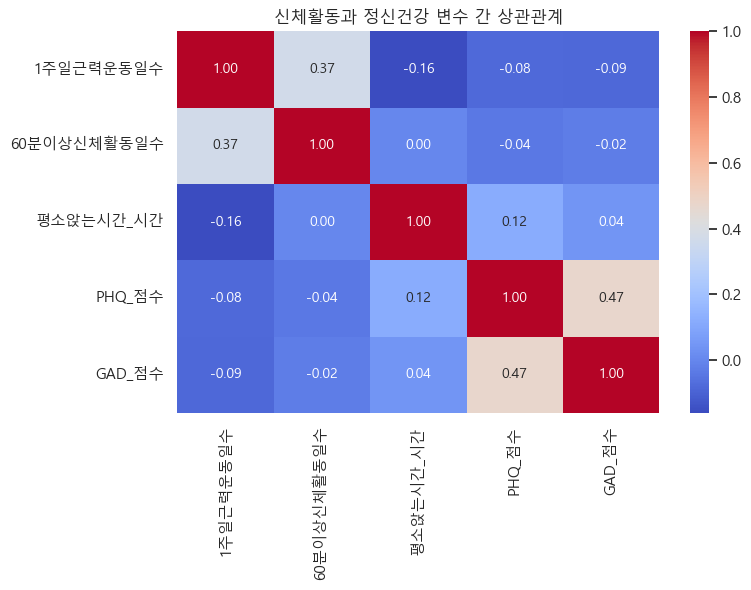

,1주일근력운동일수,60분이상신체활동일수,평소앉는시간_시간,PHQ_점수,GAD_점수
1주일근력운동일수,1.000000,0.369871,-0.160087,-0.078951,-0.085611
60분이상신체활동일수,0.369871,1.000000,0.002739,-0.042066,-0.024565
평소앉는시간_시간,-0.160087,0.002739,1.000000,0.119016,0.039539
PHQ_점수,-0.078951,-0.042066,0.119016,1.000000,0.470723
GAD_점수,-0.085611,-0.024565,0.039539,0.470723,1.000000


In [9]:
# 분석에 필요한 열만 추출
columns_of_interest = [
    '1주일근력운동일수',
    '60분이상신체활동일수',
    '평소앉는시간_시간',
    'PHQ_점수',
    'GAD_점수'
]

df_analysis_c = df[columns_of_interest].copy()

# 숫자형으로 변환 및 이상값(88 등 코드값) 제거
df_analysis_c = df_analysis_c.apply(pd.to_numeric, errors='coerce')
df_analysis_c = df_analysis_c[(df_analysis_c['1주일근력운동일수'] <= 7) &
                          (df_analysis_c['60분이상신체활동일수'] <= 7)  &
                          (df_analysis_c['평소앉는시간_시간'] <= 24)]

# 결측 제거
df_analysis_c = df_analysis_c.dropna()

# 상관관계 행렬 계산
correlation_matrix = df_analysis_c.corr()

# 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("신체활동과 정신건강 변수 간 상관관계")
plt.tight_layout()
plt.show()

correlation_matrix

In [21]:
df_analysis_1 = df[['위험군_분류','sex','age', '1주일근력운동일수','PHQ_점수','GAD_점수']]
df_analysis_2 = df[['위험군_분류','sex','age', '60분이상신체활동일수','PHQ_점수','GAD_점수']]
df_analysis_3 = df[['위험군_분류','sex','age', '평소앉는시간_시간','PHQ_점수','GAD_점수']]

df_analysis_1.loc[:, '1주일근력운동일수'] = pd.to_numeric(df_analysis_1['1주일근력운동일수'], errors='coerce')
df_analysis_2.loc[:, '60분이상신체활동일수'] = pd.to_numeric(df_analysis_2['60분이상신체활동일수'], errors='coerce')
df_analysis_3.loc[:, '평소앉는시간_시간'] = pd.to_numeric(df_analysis_3['평소앉는시간_시간'], errors='coerce')

df_analysis_1 = df_analysis_1[df_analysis_1['1주일근력운동일수'] <= 7] 
df_analysis_2 = df_analysis_2[df_analysis_2['60분이상신체활동일수'] <= 7] 
df_analysis_3 = df_analysis_3[df_analysis_3['평소앉는시간_시간'] <= 24]

In [19]:
df_analysis_1

,위험군_분류,sex,age,1주일근력운동일수,PHQ_점수,GAD_점수
0,정상,1.0,66.0,1.0,0.0,0.0
1,정상,2.0,62.0,6.0,0.0,0.0
2,정상,2.0,61.0,6.0,0.0,0.0
3,정상,2.0,22.0,1.0,3.0,3.0
4,정상,2.0,53.0,4.0,0.0,3.0
...,...,...,...,...,...,...
4399,위험,1.0,33.0,1.0,5.0,16.0
4400,위험,1.0,53.0,1.0,15.0,9.0
4401,위험,2.0,55.0,1.0,9.0,21.0
4402,위험,2.0,67.0,1.0,15.0,0.0


In [23]:
df_analysis_2

,위험군_분류,sex,age,60분이상신체활동일수,PHQ_점수,GAD_점수
23,정상,1.0,61.0,3.0,0.0,0.0
106,정상,2.0,65.0,4.0,2.0,4.0
125,정상,1.0,60.0,1.0,0.0,1.0
126,정상,1.0,29.0,1.0,5.0,3.0
244,정상,2.0,39.0,6.0,0.0,2.0
...,...,...,...,...,...,...
4308,위험,1.0,55.0,2.0,22.0,4.0
4337,위험,2.0,43.0,3.0,16.0,12.0
4348,위험,2.0,80.0,1.0,15.0,0.0
4349,위험,1.0,52.0,1.0,8.0,17.0


In [25]:
df_analysis_3

,위험군_분류,sex,age,평소앉는시간_시간,PHQ_점수,GAD_점수
0,정상,1.0,66.0,11.0,0.0,0.0
1,정상,2.0,62.0,12.0,0.0,0.0
2,정상,2.0,61.0,6.0,0.0,0.0
3,정상,2.0,22.0,11.0,3.0,3.0
4,정상,2.0,53.0,5.0,0.0,3.0
...,...,...,...,...,...,...
4399,위험,1.0,33.0,4.0,5.0,16.0
4400,위험,1.0,53.0,11.0,15.0,9.0
4401,위험,2.0,55.0,7.0,9.0,21.0
4402,위험,2.0,67.0,10.0,15.0,0.0


### 근력운동 및 60분 이상 활동일수는 정신건강 점수(PHQ, GAD)와 약한 음의 상관이 있으며, 신체활동이 많을수록 불안·우울 점수는 낮아지는 경향이 있습니다.
### 앉아있는 시간이 길수록 PHQ 점수가 높아지는 경향(우울 증가)이 관찰됩니다.
### PHQ와 GAD는 서로 밀접한 연관성을 보이며, 둘은 함께 악화될 수 있습니다.

## 시각화

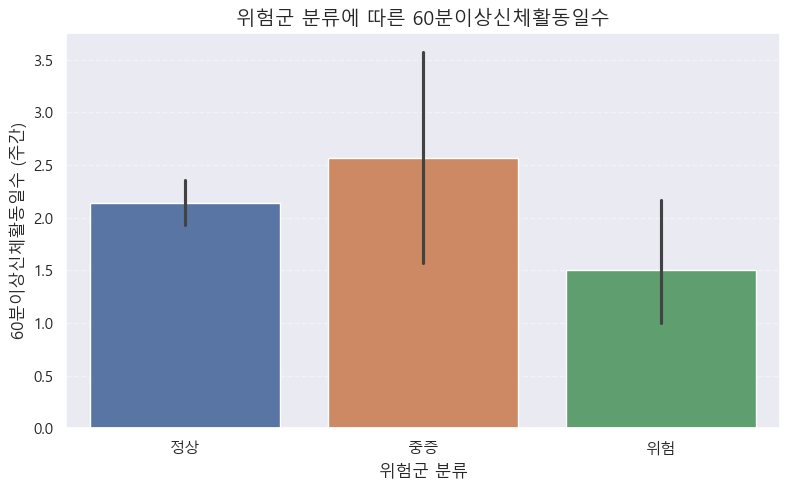

In [35]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_analysis_2, x='위험군_분류', y='60분이상신체활동일수', hue='위험군_분류')
plt.title("위험군 분류에 따른 60분이상신체활동일수", fontsize=14)
plt.xlabel("위험군 분류", fontsize=12)
plt.ylabel("60분이상신체활동일수 (주간)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

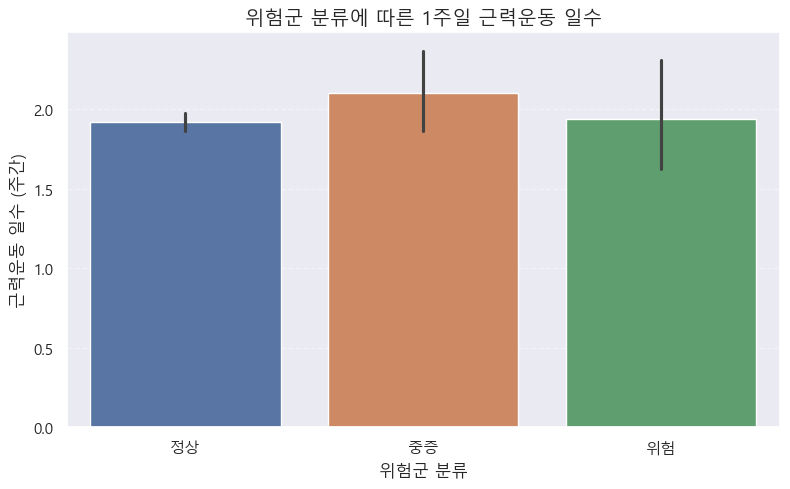

In [37]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_analysis_1, x='위험군_분류', y='1주일근력운동일수',hue='위험군_분류')
plt.title("위험군 분류에 따른 1주일 근력운동 일수", fontsize=14)
plt.xlabel("위험군 분류", fontsize=12)
plt.ylabel("근력운동 일수 (주간)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

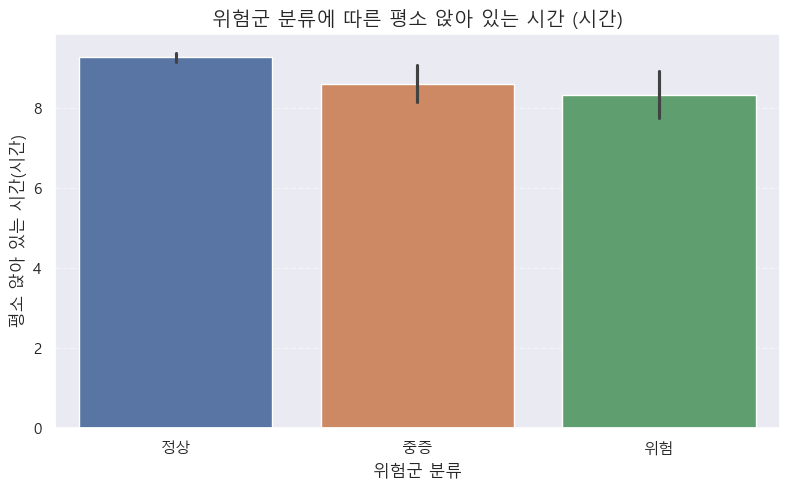

In [39]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df_analysis_3, x='위험군_분류', y='평소앉는시간_시간',hue='위험군_분류')
plt.title("위험군 분류에 따른 평소 앉아 있는 시간 (시간)", fontsize=14)
plt.xlabel("위험군 분류", fontsize=12)
plt.ylabel("평소 앉아 있는 시간(시간)", fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

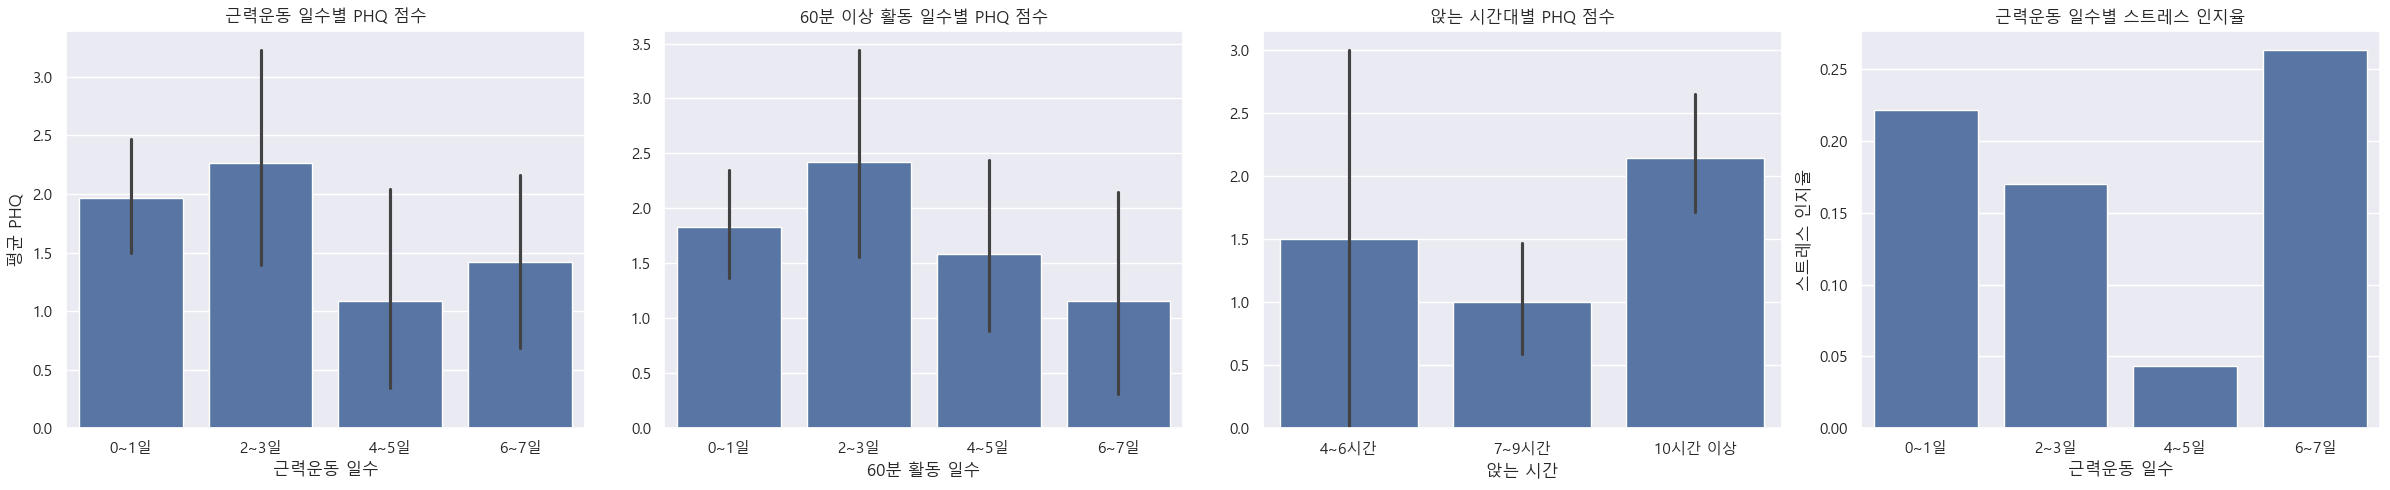

In [51]:

# 필요한 열 추출 및 정리
df_analysis = df[['1주일근력운동일수', '60분이상신체활동일수', '평소앉는시간_시간', 'PHQ_점수', '스트레스_인지']].copy()
df_analysis = df_analysis.apply(pd.to_numeric, errors='coerce')
df_analysis = df_analysis[
    (df_analysis['1주일근력운동일수'] <= 7) &
    (df_analysis['60분이상신체활동일수'] <= 7) &
    (df_analysis['평소앉는시간_시간'] <= 24)
]
df_analysis = df_analysis.dropna()

# 구간 분류 함수
def categorize_days(days):
    if days <= 1:
        return "0~1일"
    elif days <= 3:
        return "2~3일"
    elif days <= 5:
        return "4~5일"
    else:
        return "6~7일"

df_analysis['근력운동_등급'] = df_analysis['1주일근력운동일수'].apply(categorize_days)
df_analysis['60분_활동_등급'] = df_analysis['60분이상신체활동일수'].apply(categorize_days)
df_analysis['앉는시간_등급'] = pd.cut(df_analysis['평소앉는시간_시간'],
                                  bins=[3, 6, 9, 24],
                                  labels=['4~6시간', '7~9시간', '10시간 이상'])

# 그룹 순서 정의
근력운동_순서 = ["0~1일", "2~3일", "4~5일", "6~7일"]
앉는시간_순서 = ["4~6시간", "7~9시간", "10시간 이상"]

# 시각화
fig, axs = plt.subplots(1, 4, figsize=(24, 5))

sns.barplot(x='근력운동_등급', y='PHQ_점수', data=df_analysis, order=근력운동_순서, ax=axs[0])
axs[0].set_title('근력운동 일수별 PHQ 점수')
axs[0].set_xlabel('근력운동 일수')
axs[0].set_ylabel('평균 PHQ')

sns.barplot(x='60분_활동_등급', y='PHQ_점수', data=df_analysis, order=근력운동_순서, ax=axs[1])
axs[1].set_title('60분 이상 활동 일수별 PHQ 점수')
axs[1].set_xlabel('60분 활동 일수')
axs[1].set_ylabel('')

sns.barplot(x='앉는시간_등급', y='PHQ_점수', data=df_analysis, order=앉는시간_순서, ax=axs[2])
axs[2].set_title('앉는 시간대별 PHQ 점수')
axs[2].set_xlabel('앉는 시간')
axs[2].set_ylabel('')

# 스트레스 인지율 그래프 (비율 계산)
stress_by_group = df_analysis.groupby('근력운동_등급')['스트레스_인지'].mean().reindex(근력운동_순서)

sns.barplot(x=stress_by_group.index, y=stress_by_group.values, ax=axs[3])
axs[3].set_title('근력운동 일수별 스트레스 인지율')
axs[3].set_xlabel('근력운동 일수')
axs[3].set_ylabel('스트레스 인지율')

plt.tight_layout()
plt.show()

### 1. 근력운동 일수별 PHQ 점수

    결과: 근력운동을 많이 할수록 PHQ 점수가 다소 낮아지는 경향

    해석: 근력운동을 일주일 6~7일 하는 사람들의 평균 우울 점수는 가장 낮고, 거의 하지 않는 사람들은 가장 높음

    → **신체활동과 우울 사이에 부정적 경향(음의 관계)**가 일부 나타남

### 2. 60분 이상 활동 일수별 PHQ 점수
    결과: 활동일수가 늘어나도 PHQ 점수는 뚜렷한 감소 경향 없음

    해석: 유산소성 활동(60분 이상 활동)은 PHQ 점수와의 관련이 명확하지 않음
### 3. 앉는 시간대별 PHQ 점수
    결과: 앉는 시간이 적을수록 오히려 PHQ 점수가 높음

    해석: 일반적인 기대와는 반대로, 앉는 시간이 많은 사람들에서 PHQ 점수가 더 낮게 나타남

    → 역방향 관계일 수 있으며, 학생/직장인 등 안정된 집단이 앉는 시간이 많을 수 있음

### 4. 근력운동 일수별 스트레스 인지율
    결과: 근력운동이 늘어날수록 스트레스를 인지하는 비율은 줄어드는 경향

    해석: 신체적으로 활발한 사람이 스트레스를 덜 느낄 수 있음

## 가설검정

In [52]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [51]:
s1_n = df_analysis_1[df_analysis_1['위험군_분류'] == '정상']['1주일근력운동일수']
s1_m = df_analysis_1[df_analysis_1['위험군_분류'] == '중증']['1주일근력운동일수']
s1_r = df_analysis_1[df_analysis_1['위험군_분류'] == '위험']['1주일근력운동일수']

f_stat, p = stats.f_oneway(s1_n, s1_m, s1_r)
print(f"F 통계량: {f_stat:.3f}")
print(f"p-value: {p:.4f}")

F 통계량: 1.183
p-value: 0.3066


### 가설 검정 결과 (ANOVA) – 근력운동일수 기준
- 가설 설정
    - 귀무가설(H₀): 정신건강 위험군 분류에 따라 1주일 근력운동일수 평균은 차이가 없다.
    - 대립가설(H₁): 적어도 하나의 군에서 1주일 근력운동일수 평균이 다르다.

- 분석 결과
    - F 통계량: 𝑭 = 1.183
    - p-value: 0.3066

- 해석
    - ANOVA 결과, 정신건강 위험군(정상, 중증, 위험) 간 1주일 근력운동일수 평균에는 통계적으로 유의한 차이가 없는 것으로 나타났다 (F = 1.183, p = 0.3066). <br>
    p-value가 0.05보다 크므로, 귀무가설을 기각할 수 없다.

In [53]:
posthoc = pairwise_tukeyhsd(df_analysis_1['1주일근력운동일수'], df_analysis_1['위험군_분류'], alpha=0.05)
posthoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
위험,정상,-0.0178,0.9941,-0.4196,0.384,False
위험,중증,0.167,0.695,-0.3146,0.6485,False
정상,중증,0.1848,0.2736,-0.097,0.4666,False


In [54]:
s2_n = df_analysis_2[df_analysis_2['위험군_분류'] == '정상']['60분이상신체활동일수']
s2_m = df_analysis_2[df_analysis_2['위험군_분류'] == '중증']['60분이상신체활동일수']
s2_r = df_analysis_2[df_analysis_2['위험군_분류'] == '위험']['60분이상신체활동일수']

f_stat, p = stats.f_oneway(s2_n, s2_m, s2_r)
print(f"F 통계량: {f_stat:.3f}")
print(f"p-value: {p:.4f}")

F 통계량: 0.781
p-value: 0.4592


### 가설 검정 결과 (ANOVA) – 60분 이상 신체활동일수 기준
- 가설 설정
    - 귀무가설(H₀): 정신건강 위험군 분류에 따라 60분 이상 신체활동일수 평균은 차이가 없다.
    - 대립가설(H₁): 적어도 하나의 군에서 60분 이상 신체활동일수 평균이 다르다.

- 분석 결과
    - F 통계량: 0.781
    - p-value: 0.4592

- 해석
    - ANOVA 분석 결과, 정신건강 위험군(정상, 중증, 위험) 간 60분 이상 신체활동일수 평균에 통계적으로 유의한 차이는 없는 것으로 나타났다 (F = 0.781, p = 0.4592).<br>
    p-value가 0.05보다 크므로, 귀무가설을 기각할 수 없으며, 세 그룹 간 신체활동일수의 평균 차이는 통계적으로 유의하지 않다고 해석된다.

In [55]:
posthoc = pairwise_tukeyhsd(df_analysis_2['60분이상신체활동일수'], df_analysis_2['위험군_분류'], alpha=0.05)
posthoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
위험,정상,0.6351,0.5835,-0.8773,2.1475,False
위험,중증,1.0714,0.4293,-0.9623,3.1052,False
정상,중증,0.4363,0.7439,-0.967,1.8396,False


In [57]:
s3_n = df_analysis_3[df_analysis_3['위험군_분류'] == '정상']['평소앉는시간_시간']
s3_m = df_analysis_3[df_analysis_3['위험군_분류'] == '중증']['평소앉는시간_시간']
s3_r = df_analysis_3[df_analysis_3['위험군_분류'] == '위험']['평소앉는시간_시간']

f_stat, p = stats.f_oneway(s3_n, s3_m, s3_r)
print(f"F 통계량: {f_stat:.3f}")
print(f"p-value: {p:.4f}")

F 통계량: 6.991
p-value: 0.0009


### 가설 검정 결과 (ANOVA) – 평소 앉는 시간 기준
- 가설 설정
    - 귀무가설(H₀): 정신건강 위험군 분류에 따라 평소 앉는 시간(시간) 평균은 차이가 없다.
    - 대립가설(H₁): 적어도 하나의 군에서 평소 앉는 시간 평균이 다르다.

- 분석 결과
    - F 통계량: 6.991
    - p-value: 0.0009

- 해석
    - ANOVA 분석 결과, 정신건강 위험군(정상, 중증, 위험) 간 평소 앉는 시간 평균에 통계적으로 유의한 차이가 있는 것으로 나타났다 (F = 6.991, p = 0.0009).<br>
    p-value가 0.05보다 작으므로 귀무가설은 기각되며, 적어도 한 그룹 이상에서 앉는 시간 평균이 다른 그룹과 유의하게 다르다고 해석할 수 있다.


In [58]:
posthoc = pairwise_tukeyhsd(df_analysis_3['평소앉는시간_시간'], df_analysis_3['위험군_분류'], alpha=0.05)
posthoc.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
위험,정상,0.9414,0.0195,0.1217,1.7612,True
위험,중증,0.2795,0.7826,-0.7029,1.262,False
정상,중증,-0.6619,0.0191,-1.2369,-0.0869,True


### 사후 분석 결과 (Tukey HSD) – 평소 앉는 시간 기준
- 분석 목적
    - ANOVA 결과에서 정신건강 위험군 간 평소 앉는 시간 평균에 유의미한 차이가 있음이 나타났으므로, 어떤 그룹 간에 차이가 존재하는지를 확인하기 위해 Tukey의 HSD 사후검정을 실시하였다.

- 해석
    - 위험군은 정상군보다 평균적으로 약 0.94시간 더 많이 앉아 있으며, 이 차이는 통계적으로 유의하다 (p = 0.0195).
    - 정상군은 중증군보다 평균적으로 약 0.66시간 덜 앉아 있으며, 이 차이 역시 유의하다 (p = 0.0191).
    - 하지만 위험군과 중증군 간에는 유의한 차이가 없었다 (p = 0.7826).

- 결론
    - 정신건강 위험군 분류에 따라 평소 앉는 시간은 집단 간에 유의미한 차이가 있으며, 특히 정상군과 다른 두 군 간에 차이가 존재하는 것으로 나타났다. 이는 정신건강 상태가 신체 활동 패턴, 특히 앉아 있는 시간과 연관이 있을 가능성을 시사한다.